In [1]:
import numpy as np
import matplotlib.pyplot as plt
problemSize = 17
file = open("E:\JupyterNotebookWorkSpace\刘敦辉\进化算法实验\gr" + str(problemSize) + ".txt", 'r')
text = file.read()
text = text.split()
for i in range(len(text)):
    text[i] = int(text[i])

matrix = np.zeros((problemSize,problemSize),dtype = int)
k = 0
for i in range(problemSize):
    for j in range(i+ 1):
        matrix[i][j] = text[k]
        matrix[j][i] = text[k]
        k += 1
print(matrix)

[[  0 633 257  91 412 150  80 134 259 505 353 324  70 211 268 246 121]
 [633   0 390 661 227 488 572 530 555 289 282 638 567 466 420 745 518]
 [257 390   0 228 169 112 196 154 372 262 110 437 191  74  53 472 142]
 [ 91 661 228   0 383 120  77 105 175 476 324 240  27 182 239 237  84]
 [412 227 169 383   0 267 351 309 338 196  61 421 346 243 199 528 297]
 [150 488 112 120 267   0  63  34 264 360 208 329  83 105 123 364  35]
 [ 80 572 196  77 351  63   0  29 232 444 292 297  47 150 207 332  29]
 [134 530 154 105 309  34  29   0 249 402 250 314  68 108 165 349  36]
 [259 555 372 175 338 264 232 249   0 495 352  95 189 326 383 202 236]
 [505 289 262 476 196 360 444 402 495   0 154 578 439 336 240 685 390]
 [353 282 110 324  61 208 292 250 352 154   0 435 287 184 140 542 238]
 [324 638 437 240 421 329 297 314  95 578 435   0 254 391 448 157 301]
 [ 70 567 191  27 346  83  47  68 189 439 287 254   0 145 202 289  55]
 [211 466  74 182 243 105 150 108 326 336 184 391 145   0  57 426  96]
 [268 

In [2]:
DNA_SIZE = problemSize

POP_SIZE = 100
ELITE_RETENTION_SIZE = 5
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.01

N_GENERATIONS = 5000    #代数

def translateDNA(pop): #pop表示种群矩阵，一行表示一个二进制编码表示的DNA，矩阵的行数为种群数目
    city = np.zeros(pop.shape, dtype = int)
    for i in range(pop.shape[0]):
        orderArr = np.array([i for i in range(1, DNA_SIZE + 1)])
        for j in range(pop.shape[1]):
            index = pop[i][j]-1
            city[i][j] = orderArr[index]
            orderArr = np.delete(orderArr, index)
    return city
    

def get_fitness(pop): 
    city = translateDNA(pop)
    #读文件，计算代价
    allCost = []
    for i in range(city.shape[0]):
        cost = 0
        for j in range(DNA_SIZE):
            cost += matrix[city[i][j] - 1][city[i][( j + 1 ) % DNA_SIZE] - 1]
        allCost.append(cost)
    allCost = np.array(allCost)
    fit = 1 / allCost
    return fit

def select(pop, fitness, elite_retention_size):    # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(pop.shape[0]), size=POP_SIZE - elite_retention_size, replace=True, p=(fitness)/(fitness.sum()) )
    return pop[idx]

def crossover(pop, CROSSOVER_RATE):
    new_pop = []
    for i in range(pop.shape[0]//2):
        father = pop[i * 2]
        mother = pop[i * 2 + 1]
        child1 = father
        child2 = mother
        if np.random.rand() < CROSSOVER_RATE:       #产生子代时不是必然发生交叉，而是以一定的概率发生交叉
            cross_points = np.sort(np.random.randint(low=0, high=DNA_SIZE,size=2))    #随机产生交叉的点
            child1[cross_points[0]:cross_points[1]] = mother[cross_points[0]:cross_points[1]]
            child2[cross_points[0]:cross_points[1]] = father[cross_points[0]:cross_points[1]]
            new_pop.append(child1)
            new_pop.append(child2)
    return new_pop

def local_search(pop):
    local_offspring = np.zeros(pop.shape, dtype = int)
    local_offspring_fit = np.zeros(pop.shape[0], dtype = int)
#     for i in range(1, 7):
#         pop[:, -6] = i
#         for j in range(1, 6):
#             pop[:, -5] = j
    for k in range(1, 5):
        pop[:, -4] = k
        for l in range(1, 4):
            pop[:, -3] = l
            for m in range(1, 3):
                pop[:, -2] = m
                fitness = get_fitness(pop)
                local_offspring[local_offspring_fit < fitness] = pop[local_offspring_fit < fitness]
                local_offspring_fit = fitness
    return pop


def mutation(child, MUTATION_RATE):
    for j in range(DNA_SIZE):
        isMutation = np.random.rand(child.shape[0],1) < MUTATION_RATE
        child[:,j : j + 1] = np.where(isMutation, np.random.randint(1, DNA_SIZE + 1 - j, size=(child.shape[0], 1)),child[:,j : j + 1])
    return child

def elite_retention(pop, fitness, size):
    retention = []
    for i in range(size):
        max_fitness_index = np.argmax(fitness)
        retention.append(pop[max_fitness_index])
        pop = np.delete(pop, max_fitness_index, axis = 0)
        fitness = np.delete(fitness, max_fitness_index)
    return np.array(retention), pop, fitness

def print_info(pop):
    fitness = get_fitness(pop)
    max_fitness_index = np.argmax(fitness)
    print("max_fitness:", fitness[max_fitness_index])
    sample = translateDNA(pop)
    print("最优的基因型：", pop[max_fitness_index])
    print('最短路径：',sample[max_fitness_index])
    #print("(x, y):", (x[max_fitness_index], y[max_fitness_index]))
    print('minCost = ',int(1 / fitness[max_fitness_index]))


if __name__ == "__main__":
    pop = np.empty((POP_SIZE,0), dtype = int)
    for i in range(DNA_SIZE):
        pop = np.append(pop ,np.random.randint(1, DNA_SIZE + 1 - i, size=(POP_SIZE, 1)), axis = 1)

    fitness = get_fitness(pop)
    
    pop = select(pop, fitness, 0) #选择生成新的种群
    
    iter = []
    every_maxfit = []
    for _ in range(N_GENERATIONS):
        
        crossover_pop = np.array(crossover(pop, CROSSOVER_RATE))
        mutation_pop = mutation(crossover_pop, MUTATION_RATE)
        pop  = np.append(pop, mutation_pop, axis = 0)
        #pop  = np.append(pop, new_pop, axis = 0)
        
        fitness = get_fitness(pop)
        if _%10==0 :
            print(_)
        ############
            max_fitness_index = np.argmax(fitness)
            print("max_fitness:", 1/fitness[max_fitness_index])
        ##################
        
        iter.append(_)
        every_maxfit.append(fitness[np.argmax(fitness)])
        
        retention, pop, fitness = elite_retention(pop, fitness, ELITE_RETENTION_SIZE)
        pop = select(pop, fitness, ELITE_RETENTION_SIZE) #选择生成新的种群
        pop = np.append(pop, retention, axis = 0)
        pop = local_search(pop)

    print_info(pop)

0
max_fitness: 3666.0000000000005
10
max_fitness: 3028.0
20
max_fitness: 2904.0
30
max_fitness: 2904.0
40
max_fitness: 2904.0
50
max_fitness: 2842.0
60
max_fitness: 2904.0
70
max_fitness: 2904.0
80
max_fitness: 2904.0
90
max_fitness: 2897.0
100
max_fitness: 2897.0
110
max_fitness: 2897.0
120
max_fitness: 2897.0
130
max_fitness: 2778.0
140
max_fitness: 2771.0
150
max_fitness: 2771.0
160
max_fitness: 2709.0
170
max_fitness: 2771.0
180
max_fitness: 2771.0
190
max_fitness: 2771.0
200
max_fitness: 2771.0
210
max_fitness: 2771.0
220
max_fitness: 2771.0
230
max_fitness: 2771.0
240
max_fitness: 2771.0
250
max_fitness: 2771.0
260
max_fitness: 2771.0
270
max_fitness: 2771.0
280
max_fitness: 2771.0
290
max_fitness: 2771.0
300
max_fitness: 2771.0
310
max_fitness: 2771.0
320
max_fitness: 2771.0
330
max_fitness: 2771.0
340
max_fitness: 2771.0
350
max_fitness: 2771.0
360
max_fitness: 2771.0
370
max_fitness: 2771.0
380
max_fitness: 2771.0
390
max_fitness: 2771.0
400
max_fitness: 2771.0
410
max_fitness

3320
max_fitness: 2422.0
3330
max_fitness: 2422.0
3340
max_fitness: 2422.0
3350
max_fitness: 2422.0
3360
max_fitness: 2422.0
3370
max_fitness: 2360.0
3380
max_fitness: 2422.0
3390
max_fitness: 2360.0
3400
max_fitness: 2422.0
3410
max_fitness: 2422.0
3420
max_fitness: 2422.0
3430
max_fitness: 2360.0
3440
max_fitness: 2422.0
3450
max_fitness: 2422.0
3460
max_fitness: 2422.0
3470
max_fitness: 2422.0
3480
max_fitness: 2422.0
3490
max_fitness: 2360.0
3500
max_fitness: 2422.0
3510
max_fitness: 2422.0
3520
max_fitness: 2422.0
3530
max_fitness: 2422.0
3540
max_fitness: 2422.0
3550
max_fitness: 2360.0
3560
max_fitness: 2422.0
3570
max_fitness: 2413.0
3580
max_fitness: 2422.0
3590
max_fitness: 2422.0
3600
max_fitness: 2422.0
3610
max_fitness: 2422.0
3620
max_fitness: 2422.0
3630
max_fitness: 2422.0
3640
max_fitness: 2422.0
3650
max_fitness: 2422.0
3660
max_fitness: 2422.0
3670
max_fitness: 2422.0
3680
max_fitness: 2422.0
3690
max_fitness: 2360.0
3700
max_fitness: 2422.0
3710
max_fitness: 2360.0


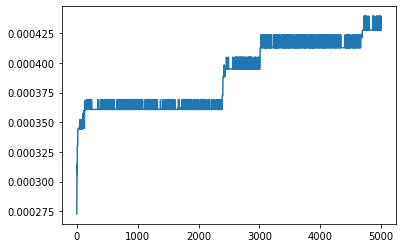

In [3]:
plt.plot(iter, every_maxfit)

In [4]:
(1 / np.array(every_maxfit)).min()

2276.0